In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the House_price_multifeature data

HP = pd.read_csv(r"C:\Users\hppav\OneDrive\Desktop\SV 20B91A0436 PROJECT\House_price_multifeatures.csv", header=0)

# Copy to back-up files

HP_bk = HP.copy()

# Display first 5 records

HP.head()

,Unnamed: 0,Id,PropertyLocationStreet1,PropertyLocationStreet2,PropertyCity,CountyFIPS,PropertyZip,OwnerName,OwnerMailAddress1,OwnerMailAddress2,OwnerCity,OwnerState,OwnerZip,CitizensTerritory,ConstructionType,NumberOfStories,NumberOfFamilies,YearBuilt,YearofRoof,YearofRoofVerified,RoofMaterial,AdjSquareFeet,Occupancy,NumberOfMonthsUnoccupied,PPC,BCEG,TypeOfResidence,FloorOfResidence,FloridaWindpool,DistancetoCoast,DistancetoSinkhole,DistancetoHydrant,DistancetoFireDepartment,FireDistrict,RespondingFireDepartment,CentralStationAlarm,AutomaticSprinklers,NumberOfClaims,LocationWindSpeed,DesignWindSpeed,InternalPressureDesign,WindborneDebrisRegion,Terrain,RoofDeckAttachment,RoofCover,RooftoWallconnection,SecondaryWaterResistance,OpeningProtection,RoofShape,DesignExposure,ValueofHome,UnattachedStructure,NoPriorInsurance,Condemned,FarmsNRanches,FraternityorSorority,Vacant,FloodZone,ConstructedOverWater,BuiltonLandfills,HomeDayCare,Pool,ParcelSize,ImprovementQuality,ImprovementQualityDate,NumberOfBuildings,NumberOfUnits,Crime,PoliceID,FireID,CountyName,PropertyState,CentroidLatitude,CentroidLongitude,IsHciProperty,CoastLatitude,CoastLongitude,FireStationLatitude,FireStationLongitude,SinkholeLatitude,SinkholeLongitude,SinkholeId,SinkholeAddress,FloodZoneRiskLevel,EffectiveYearBuilt,NumberOfBusiness,HydrantLatitude,HydrantLongitude,LastSalePrice,LastSaleDate,Homestead,FloodzoneLastUpdatedDate,StateParcelId,AssesmentYear,Geometry,TTTerritory
0,0,120210f35317ca697,503 LAKE LOUISE CIR,19-201,NAPLES,21.0,34110,"BOLTZ, LARRY P & SANDRA A",3739 WRENS NEST BLVD,NaN,MAUMEE,OH,43537.0,541.0,NaN,NaN,NaN,1988.0,NaN,False,NaN,1384.0,NaN,NaN,NaN,NaN,CONDO STACKED,NaN,NaN,2956.8,NaN,NaN,1.20,50.0,NORTH NAPLES FIRE DEPARTMENT AND RESCUE STATIO...,NaN,NaN,NaN,129.0,NaN,NaN,True,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200840.0,NaN,NaN,NaN,NaN,NaN,NaN,A:100,NaN,NaN,NaN,NaN,NaN,ABOVE AVERAGE,118.0,NaN,1.0,NaN,NaN,50.0,COLLIER,FL,26.30478,-81.81791,NaN,NaN,NaN,26.32210,-81.81959,NaN,NaN,NaN,NaN,NaN,1988.0,NaN,NaN,NaN,NaN,NaN,False,12-05-2017 00:00,C21-000-188-9852-8,2015.0,NaN,541-0
1,0,12086db272d757be6,5934 NW 7 PL,NaN,MIAMI,86.0,33127,LILIANE MORISSETTE,5934 NW 7 PL,NaN,MIAMI,FL,33127.0,32.0,NaN,NaN,NaN,2004.0,NaN,False,NaN,1534.0,NaN,NaN,1,2.0,SINGLE FAMILY,NaN,NaN,-99.0,9.56,195.70,0.98,626.0,MIAMI FIRE DEPARTMENT AND RESCUE STATION 9,NaN,NaN,NaN,146.0,NaN,NaN,True,HVHZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164994.0,NaN,NaN,NaN,NaN,NaN,NaN,A:100,NaN,NaN,NaN,NaN,4880.0,ABOVE AVERAGE,212.0,1.0,1.0,NaN,626.0,626.0,MIAMI-DADE,FL,25.82994,-80.21004,NaN,25.83218,-80.18086,25.83300,-80.19468,25.96256,-80.16641,2783.0,NaN,NaN,2004.0,NaN,25.83045,-80.21022,NaN,NaN,True,08-12-2017 00:00,C23-000-198-3578-4,2015.0,NaN,032-0
2,0,12057c35a22b0865c,5713 PALM RIVER RD,NaN,TAMPA,57.0,33619,PADRON LUIS A,5713 PALM RIVER RD,NaN,TAMPA,FL,33619.0,80.0,MASONRY,NaN,NaN,2005.0,NaN,False,NaN,2612.0,NaN,NaN,5,4.0,SINGLE FAMILY,NaN,NaN,-99.0,0.82,159.63,0.05,NaN,PALM RIVER FIRE DEPARTMENT STATION 15,NaN,NaN,NaN,120.0,NaN,NaN,True,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200346.0,NaN,NaN,NaN,NaN,NaN,NaN,A:100,NaN,NaN,NaN,NaN,16913.0,AVERAGE,117.0,1.0,1.0,NaN,NaN,NaN,HILLSBOROUGH,FL,27.94282,-82.39027,NaN,27.94080,-82.41343,27.94203,-82.39031,27.94389,-82.37694,468.0,"BRANDON Z-33 505 PAPAYA DRIVE TAMPA, FL 33619",NaN,2010.0,NaN,27.94326,-82.39026,NaN,NaN,True,01-01-2031 00:00,C39-000-406-3313-3,2015.0,NaN,080-0
3,0,12057cf31f8e69893,1805 MAGDALENE MANOR DR,NaN,TAMPA,57.0,33613,BELLO CELESTE M,1805 MAGDALENE MANOR DR,NaN,TAMPA,FL,33613.0,80.0,MASONRY,NaN,NaN,1984.0,NaN,False,NaN,2848.0,NaN,NaN,NaN,NaN,SINGLE FAMILY,NaN,NaN,-99.0,0.39,194.63,1.69,NaN,CARROLLWOOD FIRE DEPARTMENT AND RESCUE STATION 19,NaN,NaN,NaN,120.0,NaN,NaN,True,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364161.0,NaN,NaN,NaN,NaN,NaN,NaN,"A:60, X:40",NaN,NaN,NaN,NaN,27374.0,ABOVE AVERAGE,218.0,1.0,1.0,NaN,NaN,NaN,HILLSBOROUGH,FL,28.07443,-82.47794,NaN,27.96708,-82.55392,28.06714,-82.50458,28.08028,-82.47806,323.0,"SULPHUR SPRINGS Y-32, FL",NaN,2006.0,1.0,

In [3]:
# Displaying the dataset information

HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81747 entries, 0 to 81746
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                81747 non-null  int64  
 1   Id                        81747 non-null  object 
 2   PropertyLocationStreet1   81747 non-null  object 
 3   PropertyLocationStreet2   3528 non-null   object 
 4   PropertyCity              81744 non-null  object 
 5   CountyFIPS                81739 non-null  float64
 6   PropertyZip               81747 non-null  int64  
 7   OwnerName                 81743 non-null  object 
 8   OwnerMailAddress1         81425 non-null  object 
 9   OwnerMailAddress2         3235 non-null   object 
 10  OwnerCity                 81435 non-null  object 
 11  OwnerState                81534 non-null  object 
 12  OwnerZip                  78231 non-null  object 
 13  CitizensTerritory         81671 non-null  float64
 14  Constr

In [4]:
# Knowing any Duplicates are present or not
HP.duplicated().any()

True

In [5]:
# Remove the identified duplicate records 

HP= HP.drop_duplicates()
HP.shape

(59297, 96)

In [6]:
# Re-setting the row index

HP = HP.reset_index(drop=True)

# Copy the back-up file after deletion of records

HP_BK2 = HP.copy()

### DUPLICATE DATA ROWS DELETED TILL NOW

In [7]:
HP.columns

Index(['Unnamed: 0', 'Id', 'PropertyLocationStreet1',
       'PropertyLocationStreet2', 'PropertyCity', 'CountyFIPS', 'PropertyZip',
       'OwnerName', 'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity',
       'OwnerState', 'OwnerZip', 'CitizensTerritory', 'ConstructionType',
       'NumberOfStories', 'NumberOfFamilies', 'YearBuilt', 'YearofRoof',
       'YearofRoofVerified', 'RoofMaterial', 'AdjSquareFeet', 'Occupancy',
       'NumberOfMonthsUnoccupied', 'PPC', 'BCEG', 'TypeOfResidence',
       'FloorOfResidence', 'FloridaWindpool', 'DistancetoCoast',
       'DistancetoSinkhole', 'DistancetoHydrant', 'DistancetoFireDepartment',
       'FireDistrict', 'RespondingFireDepartment', 'CentralStationAlarm',
       'AutomaticSprinklers', 'NumberOfClaims', 'LocationWindSpeed',
       'DesignWindSpeed', 'InternalPressureDesign', 'WindborneDebrisRegion',
       'Terrain', 'RoofDeckAttachment', 'RoofCover', 'RooftoWallconnection',
       'SecondaryWaterResistance', 'OpeningProtection', 'Roof

In [8]:
# Delete the variables which are not influencing the target variable
#Drop method
l=['Unnamed: 0', 'Id', 'PropertyLocationStreet1',
       'PropertyLocationStreet2',
       'OwnerName', 'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity',
       'OwnerState', 'OwnerZip','NumberOfFamilies','Occupancy',
       'NumberOfMonthsUnoccupied', 'PPC', 'BCEG',
       'FloorOfResidence', 'FloridaWindpool',
       'FireDistrict', 'NumberOfClaims',
       'DesignWindSpeed', 'InternalPressureDesign', 'WindborneDebrisRegion',
       'Terrain', 'RoofDeckAttachment', 'RoofCover', 'RooftoWallconnection',
       'SecondaryWaterResistance', 'OpeningProtection',
       'DesignExposure', 'UnattachedStructure', 'Condemned', 'FarmsNRanches',
       'FraternityorSorority', 'Vacant',
       'BuiltonLandfills', 'ParcelSize',
       'ImprovementQuality', 'ImprovementQualityDate',
       'NumberOfUnits', 'PoliceID', 'FireID', 'CentroidLatitude', 'CentroidLongitude',
       'IsHciProperty', 'CoastLatitude', 'CoastLongitude',
       'FireStationLatitude', 'FireStationLongitude', 'SinkholeLatitude',
       'SinkholeLongitude', 'SinkholeId', 'SinkholeAddress',
       'FloodZoneRiskLevel', 'NumberOfBusiness',
       'HydrantLatitude', 'HydrantLongitude',
       'Homestead', 'FloodzoneLastUpdatedDate', 'StateParcelId',
        'Geometry', 'TTTerritory','PropertyState']

HP=HP.drop(l,axis=1)

In [9]:
# Display the null values in the dataset by count in each variable
HP.isnull().sum()

PropertyCity                    2
CountyFIPS                      5
PropertyZip                     0
CitizensTerritory              60
ConstructionType            14439
NumberOfStories             35449
YearBuilt                      37
YearofRoof                  54250
YearofRoofVerified             80
RoofMaterial                42976
AdjSquareFeet                  69
TypeOfResidence                 0
DistancetoCoast                44
DistancetoSinkhole            186
DistancetoHydrant           32822
DistancetoFireDepartment       62
RespondingFireDepartment       63
CentralStationAlarm         59297
AutomaticSprinklers         59297
LocationWindSpeed              44
RoofShape                   43564
ValueofHome                     9
NoPriorInsurance            59297
FloodZone                      45
ConstructedOverWater        54132
HomeDayCare                 59297
Pool                        54387
NumberOfBuildings            3219
Crime                       59297
CountyName    

In [10]:
#Del method
del HP['RespondingFireDepartment']
del HP['CentralStationAlarm']
del HP['AutomaticSprinklers']
del HP['NoPriorInsurance']
del HP['HomeDayCare']
del HP['Crime']
del HP['LastSaleDate']
del HP['LastSalePrice']
del HP['Pool']
del HP['ConstructedOverWater']
del HP['YearofRoof']
del HP['RoofMaterial']
del HP['ConstructionType']
del HP['NumberOfStories']
del HP['DistancetoHydrant']
del HP['RoofShape']

In [11]:
# Display the null values in the dataset by count in each variable
HP.isnull().sum()

PropertyCity                   2
CountyFIPS                     5
PropertyZip                    0
CitizensTerritory             60
YearBuilt                     37
YearofRoofVerified            80
AdjSquareFeet                 69
TypeOfResidence                0
DistancetoCoast               44
DistancetoSinkhole           186
DistancetoFireDepartment      62
LocationWindSpeed             44
ValueofHome                    9
FloodZone                     45
NumberOfBuildings           3219
CountyName                     0
EffectiveYearBuilt            82
AssesmentYear                 36
dtype: int64

In [12]:
# Identify the categorical variables

cat_vars = HP.columns[HP.dtypes == 'object']
print(cat_vars)

Index(['PropertyCity', 'YearofRoofVerified', 'TypeOfResidence', 'FloodZone',
       'CountyName'],
      dtype='object')


In [13]:
HP

,PropertyCity,CountyFIPS,PropertyZip,CitizensTerritory,YearBuilt,YearofRoofVerified,AdjSquareFeet,TypeOfResidence,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,ValueofHome,FloodZone,NumberOfBuildings,CountyName,EffectiveYearBuilt,AssesmentYear
0,NAPLES,21.0,34110,541.0,1988.0,False,1384.0,CONDO STACKED,2956.8,NaN,1.20,129.0,200840.0,A:100,NaN,COLLIER,1988.0,2015.0
1,MIAMI,86.0,33127,32.0,2004.0,False,1534.0,SINGLE FAMILY,-99.0,9.56,0.98,146.0,164994.0,A:100,1.0,MIAMI-DADE,2004.0,2015.0
2,TAMPA,57.0,33619,80.0,2005.0,False,2612.0,SINGLE FAMILY,-99.0,0.82,0.05,120.0,200346.0,A:100,1.0,HILLSBOROUGH,2010.0,2015.0
3,TAMPA,57.0,33613,80.0,1984.0,False,2848.0,SINGLE FAMILY,-99.0,0.39,1.69,120.0,364161.0,"A:60, X:40",1.0,HILLSBOROUGH,2006.0,2015.0
4,RIVERVIEW,57.0,33569,80.0,1986.0,False,1936.0,SINGLE FAMILY,-99.0,1.09,1.37,120.0,138691.0,"X:80, X500:20",1.0,HILLSBOROUGH,2002.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59292,MIAMI,86.0,33147,34.0,1949.0,False,1029.0,SINGLE FAMILY,-99.0,8.07,0.57,146.0,114432.0,X:100,1.0,MIAMI-DADE,1949.0,2015.0
59293,MELBOURNE,9.0,32935,64.0,1956.0,False,2163.0,SINGLE FAMILY,422.4,25.42,0.52,120.0,119690.0,X:100,1.0,BREVARD,1980.0,2015.0
59294,CORAL GABLES,86.0,33134,34.0,1939.0,False,1892.0,SINGLE FAMILY,-99.0,16.74,0.66,146.0,539553.0,X:100,1.0,MIAMI-DADE,1945.0,2015.0
59295,HOLLYWOOD,11.0,33021,35.0,1956.0,False,1325.0,SINGLE FAMILY,-99.0,1.97,0.49,140.0,194190.0,X500:100,1.0,BROWARD,1957.0,2015.0


In [14]:
B=['PropertyCity', 'YearofRoofVerified', 'TypeOfResidence', 'FloodZone',
       'CountyName']

In [15]:
#Removing null values in dataset
HP=HP.dropna()
HP.isnull().sum()

PropertyCity                0
CountyFIPS                  0
PropertyZip                 0
CitizensTerritory           0
YearBuilt                   0
YearofRoofVerified          0
AdjSquareFeet               0
TypeOfResidence             0
DistancetoCoast             0
DistancetoSinkhole          0
DistancetoFireDepartment    0
LocationWindSpeed           0
ValueofHome                 0
FloodZone                   0
NumberOfBuildings           0
CountyName                  0
EffectiveYearBuilt          0
AssesmentYear               0
dtype: int64

In [16]:
# HP['WindGustDir'].value_counts()
for i in HP.columns:
    print(HP[i].value_counts())

MIAMI              4556
ST PETERSBURG      1989
TAMPA              1893
NAPLES             1235
WEST PALM BEACH    1195
                   ... 
LAKE ALFRED           1
MARIANNA              1
GRAND RIDGE           1
SGI                   1
CANAL POINT           1
Name: PropertyCity, Length: 442, dtype: int64
11.0     10065
86.0      8494
103.0     6394
99.0      5398
9.0       3400
         ...  
121.0        2
29.0         1
77.0         1
93.0         1
65.0         1
Name: CountyFIPS, Length: 61, dtype: int64
33023    727
34145    689
32937    630
33311    500
33157    480
        ... 
33834      1
32040      1
33930      1
32443      1
33438      1
Name: PropertyZip, Length: 822, dtype: int64
37.0     7906
34.0     7043
38.0     5252
81.0     4115
554.0    2318
         ... 
734.0       1
931.0       1
737.0       1
592.0       1
793.0       1
Name: CitizensTerritory, Length: 98, dtype: int64
1979.0    1515
1959.0    1463
1957.0    1433
1958.0    1400
1988.0    1383
          ... 


In [17]:
#Viewing no.of unique values
HP.nunique()

PropertyCity                  442
CountyFIPS                     61
PropertyZip                   822
CitizensTerritory              98
YearBuilt                     122
YearofRoofVerified              2
AdjSquareFeet                4551
TypeOfResidence                16
DistancetoCoast               455
DistancetoSinkhole           3781
DistancetoFireDepartment      531
LocationWindSpeed              26
ValueofHome                 47412
FloodZone                     157
NumberOfBuildings               8
CountyName                     61
EffectiveYearBuilt            101
AssesmentYear                   4
dtype: int64

In [18]:
# Convert float to integer value of 'CountyFIPS' and 'CitizensTerritory'

HP['CountyFIPS'] = HP['CountyFIPS'].astype(int)
HP['CitizensTerritory'] = HP['CitizensTerritory'].astype(int)
HP['YearBuilt'] = HP['YearBuilt'].astype(int)
HP['DistancetoCoast'] = HP['DistancetoCoast'].astype(int)
HP['AdjSquareFeet'] = HP['AdjSquareFeet'].astype(int)
HP['DistancetoSinkhole'] = HP['DistancetoSinkhole'].astype(int)
HP['DistancetoFireDepartment'] = HP['DistancetoFireDepartment'].astype(int)
HP['LocationWindSpeed'] = HP['LocationWindSpeed'].astype(int)
HP['ValueofHome'] = HP['ValueofHome'].astype(int)
HP['NumberOfBuildings'] = HP['NumberOfBuildings'].astype(int)
HP['EffectiveYearBuilt'] = HP['EffectiveYearBuilt'].astype(int)
HP['AssesmentYear'] = HP['AssesmentYear'].astype(int)
# Display HP data

HP

,PropertyCity,CountyFIPS,PropertyZip,CitizensTerritory,YearBuilt,YearofRoofVerified,AdjSquareFeet,TypeOfResidence,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,ValueofHome,FloodZone,NumberOfBuildings,CountyName,EffectiveYearBuilt,AssesmentYear
1,MIAMI,86,33127,32,2004,False,1534,SINGLE FAMILY,-99,9,0,146,164994,A:100,1,MIAMI-DADE,2004,2015
2,TAMPA,57,33619,80,2005,False,2612,SINGLE FAMILY,-99,0,0,120,200346,A:100,1,HILLSBOROUGH,2010,2015
3,TAMPA,57,33613,80,1984,False,2848,SINGLE FAMILY,-99,0,1,120,364161,"A:60, X:40",1,HILLSBOROUGH,2006,2015
4,RIVERVIEW,57,33569,80,1986,False,1936,SINGLE FAMILY,-99,1,1,120,138691,"X:80, X500:20",1,HILLSBOROUGH,2002,2015
5,BRANDON,57,33510,80,1985,False,1468,SINGLE FAMILY,-99,1,1,120,104365,X:100,1,HILLSBOROUGH,2000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59292,MIAMI,86,33147,34,1949,False,1029,SINGLE FAMILY,-99,8,0,146,114432,X:100,1,MIAMI-DADE,1949,2015
59293,MELBOURNE,9,32935,64,1956,False,2163,SINGLE FAMILY,422,25,0,120,119690,X:100,1,BREVARD,1980,2015
59294,CORAL GABLES,86,33134,34,1939,False,1892,SINGLE FAMILY,-99,16,0,146,539553,X:100,1,MIAMI-DADE,1945,2015
59295,HOLLYWOOD,11,33021,35,1956,False,1325,SINGLE FAMILY,-99,1,0,140,194190,X500:100,1,BROWARD,1957,2015


In [19]:
#Changing negavtive values into postive values by absolute function
np.absolute(HP['DistancetoCoast'])

1         99
2         99
3         99
4         99
5         99
        ... 
59292     99
59293    422
59294     99
59295     99
59296     99
Name: DistancetoCoast, Length: 55957, dtype: int32

In [20]:
#label Enoding by default
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
HP['CountyName']=le.fit_transform(HP['CountyName'])
HP['FloodZone']=le.fit_transform(HP['FloodZone'])
HP['TypeOfResidence']=le.fit_transform(HP['TypeOfResidence'])
HP['YearofRoofVerified']=le.fit_transform(HP['YearofRoofVerified'])
HP['PropertyCity']=le.fit_transform(HP['PropertyCity'])

In [21]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55957 entries, 1 to 59296
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   PropertyCity              55957 non-null  int32
 1   CountyFIPS                55957 non-null  int32
 2   PropertyZip               55957 non-null  int64
 3   CitizensTerritory         55957 non-null  int32
 4   YearBuilt                 55957 non-null  int32
 5   YearofRoofVerified        55957 non-null  int32
 6   AdjSquareFeet             55957 non-null  int32
 7   TypeOfResidence           55957 non-null  int32
 8   DistancetoCoast           55957 non-null  int32
 9   DistancetoSinkhole        55957 non-null  int32
 10  DistancetoFireDepartment  55957 non-null  int32
 11  LocationWindSpeed         55957 non-null  int32
 12  ValueofHome               55957 non-null  int32
 13  FloodZone                 55957 non-null  int32
 14  NumberOfBuildings         55957 non-nu

In [22]:
# Display the columns in concrete dataset

HP.columns

Index(['PropertyCity', 'CountyFIPS', 'PropertyZip', 'CitizensTerritory',
       'YearBuilt', 'YearofRoofVerified', 'AdjSquareFeet', 'TypeOfResidence',
       'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment',
       'LocationWindSpeed', 'ValueofHome', 'FloodZone', 'NumberOfBuildings',
       'CountyName', 'EffectiveYearBuilt', 'AssesmentYear'],
      dtype='object')

In [23]:
# Prepare cols1 for scaling
cols1 =['PropertyCity', 'CountyFIPS', 'PropertyZip', 'CitizensTerritory',
       'YearBuilt', 'YearofRoofVerified', 'AdjSquareFeet', 'TypeOfResidence',
       'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoFireDepartment',
       'LocationWindSpeed', 'FloodZone', 'NumberOfBuildings',
       'CountyName', 'EffectiveYearBuilt', 'AssesmentYear']

In [24]:
# Identify the independent and Target variables

IndepVar = []
for col in HP.columns:
    if col != 'ValueofHome':
        IndepVar.append(col)

TargetVar = 'ValueofHome'

x = HP[IndepVar]
y = HP[TargetVar]

In [25]:
# Eliminate the outlier in 'ValueofHome' and write data to new file

ValueofHome_UL = round(HP.ValueofHome.mean() + 3 * HP.ValueofHome.std(),3)
ValueofHome_LL = round(HP.ValueofHome.mean() - 3 * HP.ValueofHome.std(),3)
HP_new = HP[(HP.ValueofHome > ValueofHome_LL) & (HP.ValueofHome < ValueofHome_UL)]
HP_bk = HP_new
HP_new.shape

(55088, 18)

<AxesSubplot:xlabel='ValueofHome'>

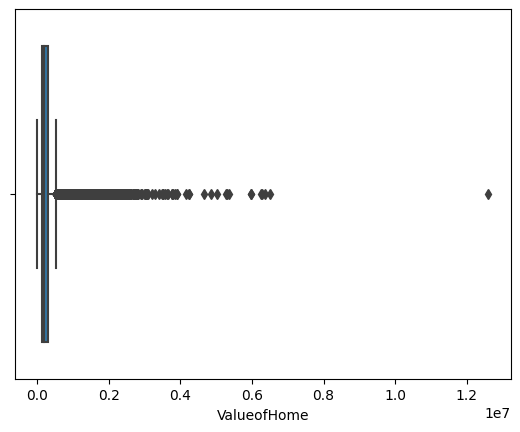

In [26]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=HP["ValueofHome"])

<AxesSubplot:xlabel='ValueofHome'>

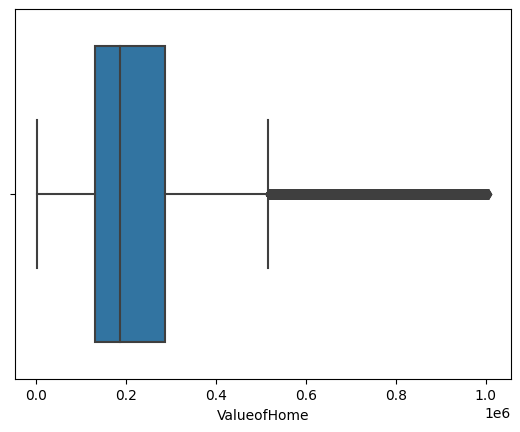

In [27]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=HP_new["ValueofHome"])

In [28]:
# Split the data into train and test

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=143)

# Display the shape of the train_data and test_data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39169, 17), (16788, 17), (39169,), (16788,))

In [29]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

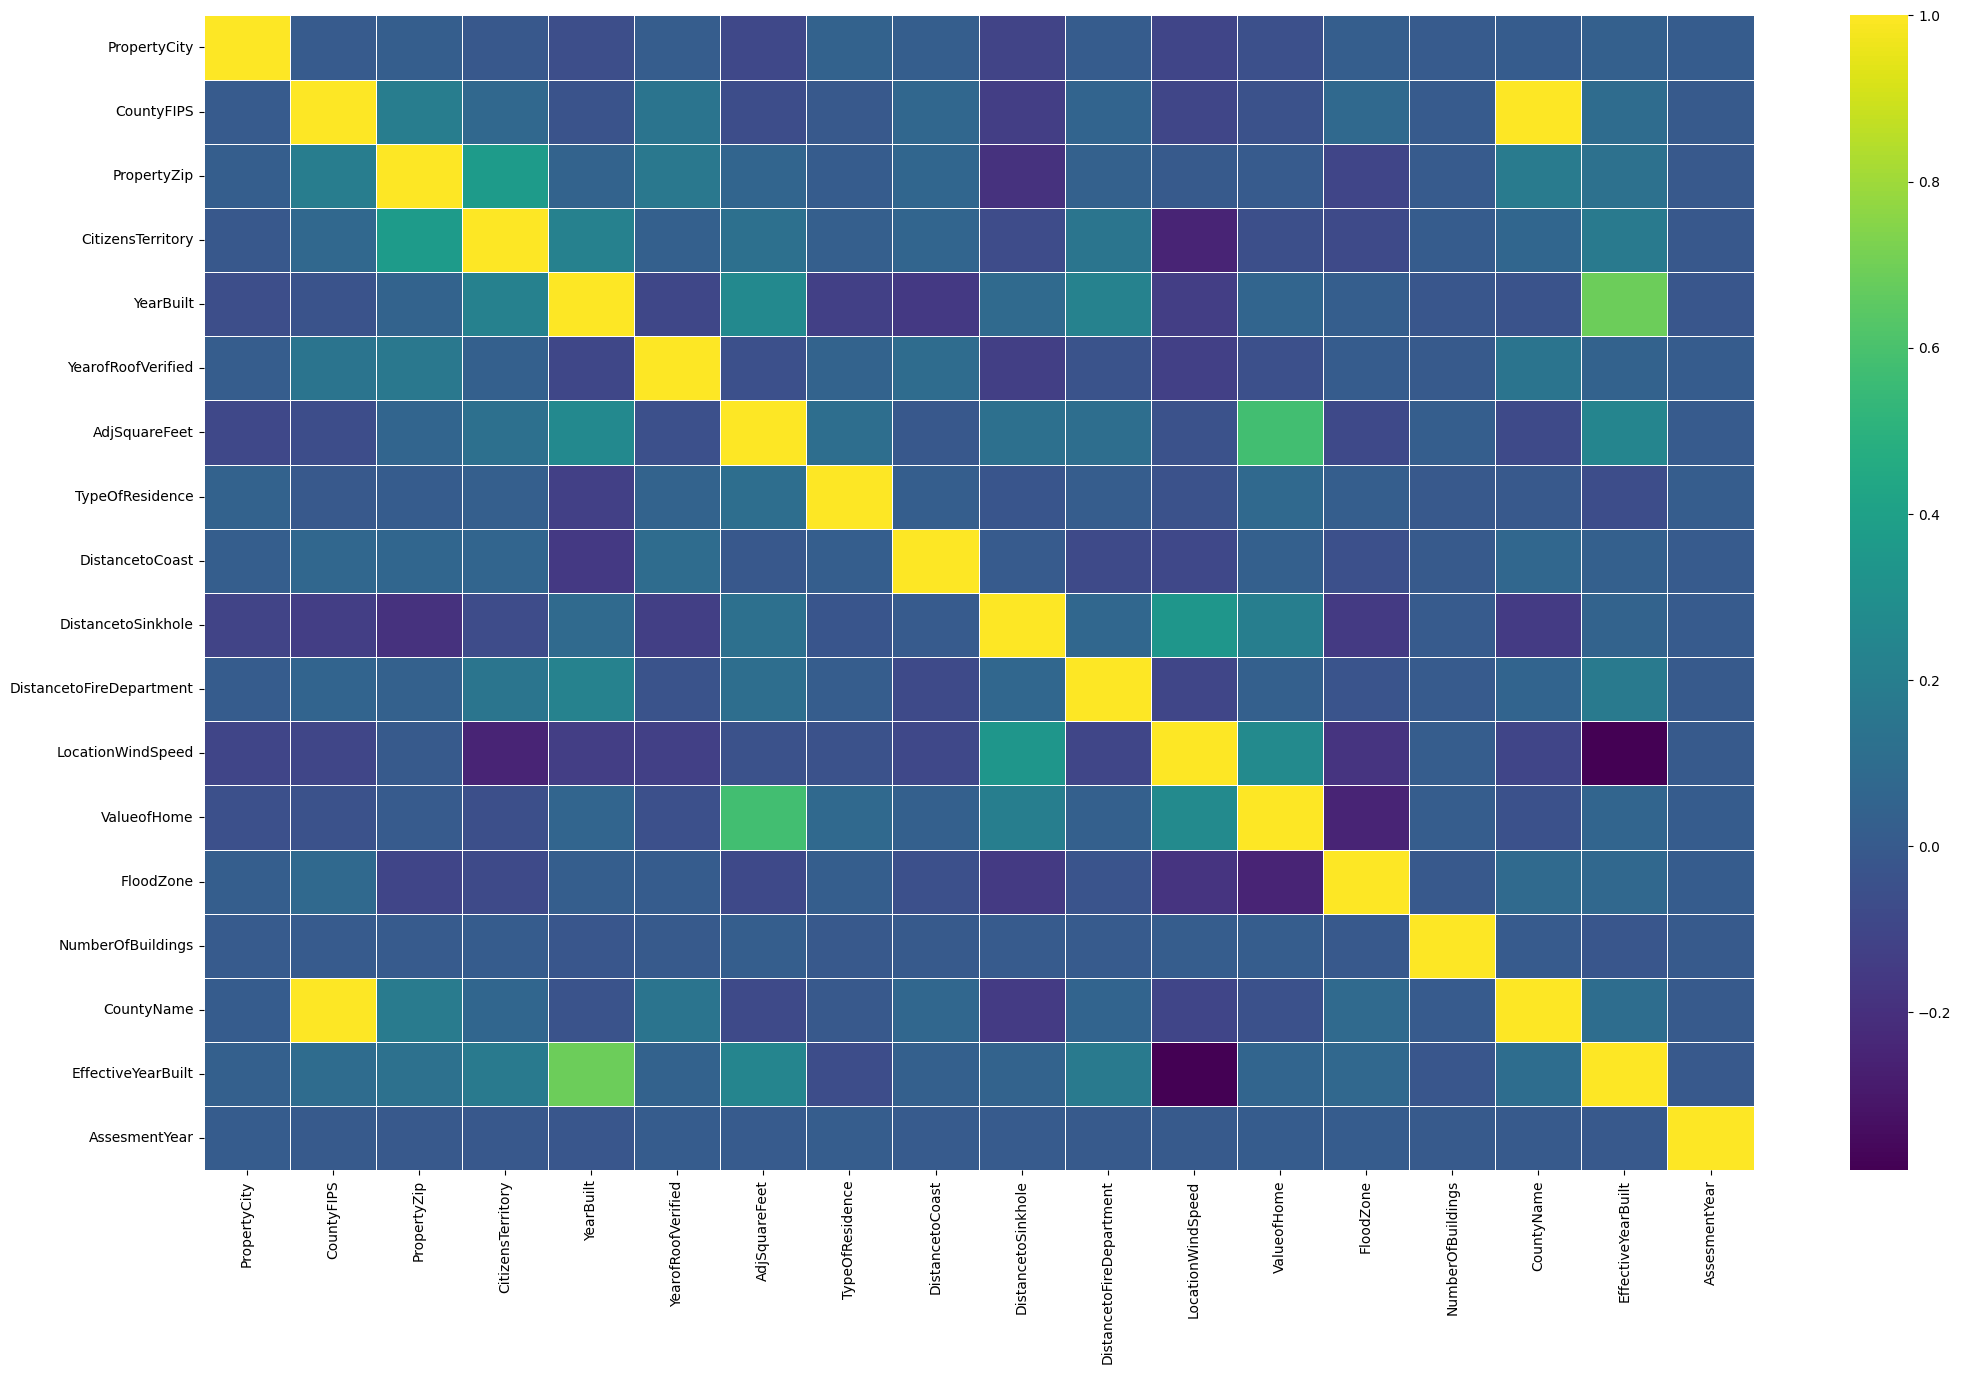

In [47]:
#Correlation Matrix
plt.figure(figsize=(25,15))
sns.heatmap(HP_new.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap='viridis')
plt.show()

In [31]:
HP_new.corr()

,PropertyCity,CountyFIPS,PropertyZip,CitizensTerritory,YearBuilt,YearofRoofVerified,AdjSquareFeet,TypeOfResidence,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,ValueofHome,FloodZone,NumberOfBuildings,CountyName,EffectiveYearBuilt,AssesmentYear
PropertyCity,1.000000,0.001464,0.020441,-0.010121,-0.061388,0.014691,-0.086108,0.040108,0.022049,-0.112149,0.009671,-0.103736,-0.051882,0.020062,0.004758,0.007277,0.030067,0.008921
CountyFIPS,0.001464,1.000000,0.194939,0.074866,-0.036238,0.144360,-0.068253,-0.007297,0.066697,-0.135409,0.054252,-0.098429,-0.040555,0.078450,0.003488,0.998617,0.097828,-0.001696
PropertyZip,0.020441,0.194939,1.000000,0.365709,0.049233,0.166461,0.057594,0.006535,0.064673,-0.193770,0.036111,-0.001779,0.004013,-0.104024,0.003955,0.183493,0.125047,-0.008219
CitizensTerritory,-0.010121,0.074866,0.365709,1.000000,0.215013,0.028757,0.115004,0.022948,0.058378,-0.073957,0.151650,-0.250499,-0.053621,-0.080061,0.008065,0.062042,0.179615,-0.013172
YearBuilt,-0.061388,-0.036238,0.049233,0.215013,1.000000,-0.094790,0.263606,-0.124817,-0.158348,0.083746,0.226634,-0.139554,0.056353,0.018738,-0.018736,-0.036692,0.688126,-0.015466
YearofRoofVerified,0.014691,0.144360,0.166461,0.028757,-0.094790,1.000000,-0.052543,0.044619,0.097226,-0.133495,-0.035289,-0.124296,-0.052967,0.009730,-0.002999,0.144556,0.042204,0.010145
AdjSquareFeet,-0.086108,-0.068253,0.057594,0.115004,0.263606,-0.052543,1.000000,0.105579,-0.014489,0.119578,0.108490,-0.040301,0.580343,-0.083699,0.019692,-0.075877,0.241133,0.001061
TypeOfResidence,0.040108,-0.007297,0.006535,0.022948,-0.124817,0.044619,0.105579,1.000000,0.020456,-0.025807,0.015838,-0.039711,0.081856,0.021144,-0.005134,-0.006107,-0.069762,0.014346
DistancetoCoast,0.022049,0.066697,0.064673,0.058378,-0.158348,0.097226,-0.014489,0.020456,1.000000,0.004119,-0.077606,-0.091134,0.028181,-0.052507,-0.002928,0.069054,0.029255,0.002744
DistancetoSinkhole,-0.112149,-0.135409,-0.193770,-0.073957,0.083746,-0.133495,0.119578,-0.025807,0.004119,1.000000,0.067030,0.342294,0.197923,-0.151996,0.004220,-0.147189,0.047199,0.003320


In [32]:
HP_new.head()

,PropertyCity,CountyFIPS,PropertyZip,CitizensTerritory,YearBuilt,YearofRoofVerified,AdjSquareFeet,TypeOfResidence,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,ValueofHome,FloodZone,NumberOfBuildings,CountyName,EffectiveYearBuilt,AssesmentYear
1,243,86,33127,32,2004,0,1534,13,-99,9,0,146,164994,0,1,37,2004,2015
2,398,57,33619,80,2005,0,2612,13,-99,0,0,120,200346,0,1,24,2010,2015
3,398,57,33613,80,1984,0,2848,13,-99,0,1,120,364161,28,1,24,2006,2015
4,345,57,33569,80,1986,0,1936,13,-99,1,1,120,138691,152,1,24,2002,2015
5,41,57,33510,80,1985,0,1468,13,-99,1,1,120,104365,110,1,24,2000,2015


In [33]:
# Build the multi regression model

from sklearn.linear_model import LinearRegression  

# Create object for the model

ModelMLR = LinearRegression()

# Train the model with training data

ModelMLR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = ModelMLR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
#print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred)*100,3), '%')
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 148749.994
Mean Squared Error (MSE): 50517835961.765
Root Mean Squared Error (RMSE): 224761.732
R2_score: 0.115042
Mean Absolute Percentage Error (MAPE): 75.876 %
Mean Absolute Percentage Error (MAPE): 75.876 %
Adj R Square:  0.114773


In [34]:
Results = pd.DataFrame({'ValueofHome_A':y_test, 'ValueofHome_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = HP_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,PropertyCity,CountyFIPS,PropertyZip,CitizensTerritory,YearBuilt,YearofRoofVerified,AdjSquareFeet,TypeOfResidence,DistancetoCoast,DistancetoSinkhole,DistancetoFireDepartment,LocationWindSpeed,ValueofHome,FloodZone,NumberOfBuildings,CountyName,EffectiveYearBuilt,AssesmentYear,ValueofHome_A,ValueofHome_P
42918,117,11,33334,35,1960,0,1623,13,-99,2,1,140,349420,83,1,5,1961,2015,349420,285285.036674
15031,67,11,33063,37,1985,0,2086,13,-99,6,0,140,225590,153,1,5,1986,2015,225590,336049.980817
9416,82,11,33024,37,2000,0,1723,13,-99,4,1,140,267150,83,1,5,2001,2015,267150,318127.362314
58913,169,9,32903,57,1927,0,1687,13,1320,24,0,120,246740,110,1,4,1985,2015,246740,293132.351767
26084,160,11,33021,35,1964,0,1480,13,-99,2,1,140,214740,109,1,5,1965,2015,214740,233994.197856


In [35]:
# Load the result dataset

RGRResults = pd.read_csv(r"C:\Users\hppav\OneDrive\Desktop\DAYS AIML INTERN\DAY 4\svm naivebayes k-means\RGRResults.csv", header=0)

RGRResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [36]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

from sklearn.svm import SVR
#import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import BayesianRidge
#from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelBRR = BayesianRidge()

ModelSVR = SVR()
#modelXGR = xgb.XGBRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
#modelBRR = BayesianRidge()
#modelBGR = BaggingRegressor()
#modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
#                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
#                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
#                                     min_impurity_split=None, init=None, random_state=None, max_features=None,
#                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
#                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

#MM = [modelmlg, modeldcr, modelrfr, modelSVR, modelXGR, modelKNN, modelETR, modelBRR, modelBGR, modelGBR]
MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelBRR, ModelSVR, ModelKNN]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResults = RGRResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 148749.994
Mean Squared Error (MSE): 50517835961.765
Root Mean Squared Error (RMSE): 224761.732
R2_score: 0.115042
Root Mean Squared Log Error (RMSLE): 12.323
Mean Absolute Percentage Error (MAPE): 75.88 %
Adj R Square:  0.114773
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 104929.974
Mean Squared Error (MSE): 59335600587.829
Root Mean Squared Error (RMSE): 243588.999
R2_score: -0.039425
Root Mean Squared Log Error (RMSLE): 12.403
Mean Absolute Percentage Error (MAPE): 42.32 %
Adj R Square:  -0.039741
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 90304.518
Mean Squared Error (MSE): 37154178598.576
Root Mean Squared Error (RMSE): 192754.192
R2_score: 0.349143
Root Mean Squared L

In [37]:
RGRResults

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),148749.993825,0.114773,224761.731533,75.876403,5.051784e+10,12.322796,0.115042
1,DecisionTreeRegressor(),104929.973890,-0.039741,243588.999316,42.321642,5.933560e+10,12.403238,-0.039425
2,"(DecisionTreeRegressor(max_features='auto', ra...",90304.518052,0.348945,192754.192169,37.463553,3.715418e+10,12.169171,0.349143
3,"(ExtraTreeRegressor(random_state=1379279187), ...",92871.165506,0.447142,177624.177258,39.105895,3.155035e+10,12.087425,0.447310
4,BayesianRidge(),148487.362270,0.116390,224556.412191,75.722091,5.042558e+10,12.321882,0.116658
5,SVR(),124551.945903,-0.070384,247152.501533,52.696911,6.108436e+10,12.417761,-0.070059
6,KNeighborsRegressor(),79629.693031,0.523101,164971.243103,35.531061,2.721551e+10,12.013526,0.523246


In [38]:
del RGRResults['Root_Mean_Squared_Error_RMSE']
del RGRResults['Mean_Absolute_Percentage_Error_MAPE']
del RGRResults['Mean_Squared_Error_MSE']
del RGRResults['Root_Mean_Squared_Log_Error_RMSLE']

In [39]:
RGRResults

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,R2_score
0,LinearRegression(),148749.993825,0.114773,0.115042
1,DecisionTreeRegressor(),104929.973890,-0.039741,-0.039425
2,"(DecisionTreeRegressor(max_features='auto', ra...",90304.518052,0.348945,0.349143
3,"(ExtraTreeRegressor(random_state=1379279187), ...",92871.165506,0.447142,0.447310
4,BayesianRidge(),148487.362270,0.116390,0.116658
5,SVR(),124551.945903,-0.070384,-0.070059
6,KNeighborsRegressor(),79629.693031,0.523101,0.523246
